In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../../data/birth_and_emerg_MATCHED_60_percent.csv") #changed the "similarity" threshold becuase the 90 percent one didn't
#match 140 out of 181 unique values for drugNames.... However, because of that the drugName "Levonorgestrel" gets classified as "etonogestrel"

In [3]:
data

,Unnamed: 0.1,Unnamed: 0,uniqueID,drugName,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
0,0,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,NaN
1,1,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,NaN
2,2,6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,etonogestrel,standard
3,3,9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,ethinyl estradiol / norethindrone,standard
4,4,14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,etonogestrel,standard
...,...,...,...,...,...,...,...,...,...,...,...
31246,31246,161268,76151,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9,ethinyl estradiol / levonorgestrel,standard
31247,31247,161269,73058,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13,ethinyl estradiol / norethindrone,standard
31248,31248,161271,148859,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4,levonorgestrel,standard
31249,31249,161273,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,etonogestrel,standard


In [4]:
data = data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "uniqueID"]) #removing unnecessary columns

In [151]:
data

,drugName,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,NaN
1,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,NaN
2,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,etonogestrel,standard
3,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,ethinyl estradiol / norethindrone,standard
4,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,etonogestrel,standard
...,...,...,...,...,...,...,...,...
31246,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9,ethinyl estradiol / levonorgestrel,standard
31247,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13,ethinyl estradiol / norethindrone,standard
31248,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4,levonorgestrel,standard
31249,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,etonogestrel,standard


In [5]:
data = data.rename(columns={"drugName": "provided_drug_name"}) #changing "drugName" to "provided_drug_name" to reflect that we got those names
#from reviewers

In [6]:
data["matched_generic_name"].value_counts(dropna=False) ##top 30 most common provided_drug_names including Nans

matched_generic_name
etonogestrel                                               9912
ethinyl estradiol / norethindrone                          8963
levonorgestrel                                             2682
NaN                                                        1840
ethinyl estradiol / levonorgestrel                         1354
drospirenone / ethinyl estradiol                           1286
norethindrone                                               984
medroxyprogesterone                                         983
Copper                                                      975
ethinyl estradiol / norgestimate                            915
ethinyl estradiol / etonogestrel                            733
desogestrel / ethinyl estradiol                             254
ethinyl estradiol / norelgestromin                          159
ethinyl estradiol / norgestrel                               79
ulipristal                                                   55
drospirenone / ethi

In [7]:
data.shape

(31251, 8)

In [8]:
data["matched_generic_name"] = data["matched_generic_name"].str.replace("ethinyl estradiol + norelgestromin", 
                                                                        "ethinyl estradiol / norelgestromin") 
#I think there were values liek ethinyl "estradiol + norelgestromin" before, but I ran this notebook again and cannot find it again

In [9]:
#Showing counts of value for provided_drug_name in a descending order as well as a matched_generic_name and a "matched_type"

data[["provided_drug_name", "matched_generic_name", "matched_type"]].value_counts(dropna=False).head(30)

provided_drug_name                  matched_generic_name                matched_type              
Levonorgestrel                      etonogestrel                        standard                      3350
Etonogestrel                        etonogestrel                        standard                      3314
Ethinyl estradiol / norethindrone   ethinyl estradiol / norethindrone   standard                      2337
Nexplanon                           etonogestrel                        standard                      2149
Ethinyl estradiol / levonorgestrel  ethinyl estradiol / norethindrone   standard                      1600
Ethinyl estradiol / norgestimate    ethinyl estradiol / norethindrone   standard                      1580
Implanon                            etonogestrel                        Implantable rods              1095
Mirena                              levonorgestrel                      standard                       965
Skyla                               levonorge

In [10]:
data["provided_drug_name"].nunique() #We have 182 unique values for "provided_drug_name"

182

In [11]:
data[["matched_type"]].value_counts() #summarizing counts of all values present in "matched_type" - pay attention to "emergency" count 

matched_type              
standard                      26459
Intrauterine devices (IUD)     1797
Implantable rods               1095
emergency                        60
Name: count, dtype: int64

In [12]:
data.isnull().sum() #just checking how many null values there are for "matched_generic_name", "matched_type" - how many "provided_drug_names"
# didn't get matched

provided_drug_name         0
condition                  0
review                     0
rating                     0
date                       0
usefulCount                0
matched_generic_name    1840
matched_type            1840
dtype: int64

In [163]:
data[data["matched_generic_name"].isnull()] #checking out provided_drugs_names, which didn't have "matched_generic_name" mapped

,provided_drug_name,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,NaN
1,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,NaN
21,Jolivette,Birth Control,"""I took Jolivette 6 weeks after I went home wi...",8,12-Mar-13,10,NaN,NaN
42,Jolivette,Birth Control,"""I started taking Jolivette 5 months ago. Firs...",8,3-Nov-17,1,NaN,NaN
44,Ortho Tri-Cyclen,Birth Control,"""I am 25 years old and have been taking this f...",1,18-Feb-16,13,NaN,NaN
...,...,...,...,...,...,...,...,...
31120,Ortho Evra,Birth Control,"""I started the patch a few months ago from my ...",10,20-Aug-12,6,NaN,NaN
31164,Ortho Tri-Cyclen Lo,Birth Control,"""This was by far the worst pill I have been on...",1,8-May-15,1,NaN,NaN
31175,Ortho Micronor,Birth Control,"""I was on a combo pill for years before Micron...",9,11-May-15,34,NaN,NaN
31186,Yaz,Birth Control,"""IMPORTANT: I started Yaz about a year ago and...",6,20-Sep-11,1,NaN,NaN


In [13]:
data[data["provided_drug_name"] == "Implanon"] #this drug name matched a generic name with 60% matching, but didn't with 90 (you can refer to 
#EDA_90 notebook

,provided_drug_name,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
6,Implanon,Birth Control,"""Never again! After being on depo I was suppos...",2,20-Aug-15,1,etonogestrel,Implantable rods
8,Implanon,Birth Control,"""I have been on this for 8 months and sad to s...",1,1-Sep-11,2,etonogestrel,Implantable rods
48,Implanon,Birth Control,"""I&#039;ve had Implanon for a little over a ye...",1,13-Dec-11,0,etonogestrel,Implantable rods
87,Implanon,Birth Control,"""It&#039;s a great birth control... but only b...",3,2-Feb-10,1,etonogestrel,Implantable rods
201,Implanon,Birth Control,"""I got the Implanon 3 years ago and have had n...",10,8-May-14,3,etonogestrel,Implantable rods
...,...,...,...,...,...,...,...,...
31174,Implanon,Birth Control,"""I&#039;m 19, and I got the implanon towards t...",9,27-Apr-16,14,etonogestrel,Implantable rods
31191,Implanon,Birth Control,"""I was on implanon for exactly one year before...",1,18-Oct-15,2,etonogestrel,Implantable rods
31207,Implanon,Birth Control,"""I started Implanon December of 2009. Everyth...",5,3-Jun-12,0,etonogestrel,Implantable rods
31216,Implanon,Birth Control,"""I got the rod put in Feb of 2016.. sooo 14 mo...",2,8-May-17,5,etonogestrel,Implantable rods


In [14]:
null_drug_name = data[data["matched_generic_name"].isnull()] #I want to count values of all the drug names that didn't get mapped

In [15]:
null_drug_name["provided_drug_name"].value_counts().head(30) #checking the value of top drug names that didn't get mapped - VIZ

provided_drug_name
Ortho Evra                    219
Apri                          210
TriNessa                      191
Yaz                           188
Ortho Tri-Cyclen Lo           179
Mononessa                     101
Alesse                         92
Ortho Tri-Cyclen               87
Aubra                          78
Zarah                          60
Beyaz                          59
Jolivette                      57
Nora-Be                        52
Ortho Micronor                 50
Lyza                           44
Ortho Cyclen                   33
Zovia                          30
Quasense                       25
Errin                          23
Ortho-Cept                     11
Lybrel                          9
Lo / Ovral                      8
TriNessa Lo                     7
Lo / Ovral-28                   5
Cyred                           5
Mircette                        5
Nikki                           5
Depo-Provera Contraceptive      4
Vestura                      

In [16]:
null_drug_name["provided_drug_name"].nunique() #30 unique names with nulls is an acceptable outcome (it used to be 140 for 90% similarity)

30

In [167]:
#However, we still do have to replace Levonorgestrel with "matched generic name" levonorgestrel instead of etonogestrel ("etonogestrel" got
#wrongly matched using the 60% similarity when mapping, but we will manually replace it below ->)

In [17]:
data.loc[data["provided_drug_name"] == "Levonorgestrel", "matched_generic_name"] = data.loc[data["provided_drug_name"] == 
"Levonorgestrel", "matched_generic_name"].replace("etonogestrel", "levonorgestrel")

In [18]:
data #data after replacing matched_generic_name for "Levonorgestrel" with the correct mapping of levonorgestrel (instead of etonogestrel)

,provided_drug_name,condition,review,rating,date,usefulCount,matched_generic_name,matched_type
0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,NaN,NaN
1,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,NaN,NaN
2,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,levonorgestrel,standard
3,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,ethinyl estradiol / norethindrone,standard
4,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10,etonogestrel,standard
...,...,...,...,...,...,...,...,...
31246,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,28-Jan-14,9,ethinyl estradiol / levonorgestrel,standard
31247,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,20-Apr-15,13,ethinyl estradiol / norethindrone,standard
31248,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,26-Jan-16,4,levonorgestrel,standard
31249,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,etonogestrel,standard


In [47]:
#I had an idea idea to manually fill in "matched_generic_name", "matched_type" for drug names, where the count nulls is bigger than 100. 
#However, I decided against doing so because the "matched" data we have is mapped against a somewhat unified data, meaning: the frame of 
#reference comes from the same source - filling the data manually could lead to incorrect mappig or mistakes. I'd suggest not removing the
#null values - the count of provided_drug_names is significant for data with null "matched_generic_name", "matched_type" columns and can lead
#to interesting insights

In [170]:
#Let's check once more what matched_generic_name and _matched_types are assigned for each provided_drug_name

In [19]:
data[["provided_drug_name", "matched_generic_name", "matched_type"]].value_counts(dropna=False).head(30)

provided_drug_name                  matched_generic_name                matched_type              
Levonorgestrel                      levonorgestrel                      standard                      3350
Etonogestrel                        etonogestrel                        standard                      3314
Ethinyl estradiol / norethindrone   ethinyl estradiol / norethindrone   standard                      2337
Nexplanon                           etonogestrel                        standard                      2149
Ethinyl estradiol / levonorgestrel  ethinyl estradiol / norethindrone   standard                      1600
Ethinyl estradiol / norgestimate    ethinyl estradiol / norethindrone   standard                      1580
Implanon                            etonogestrel                        Implantable rods              1095
Mirena                              levonorgestrel                      standard                       965
Skyla                               levonorge

In [20]:
data["matched_generic_name"].value_counts(dropna=False).head(30) #the distribution of the most populad generic names have changed after
#replacing etonogestrel wtih levonorgestrel in "matched_generic_name" for "Levonorgestrel" in provided_drug_names

matched_generic_name
ethinyl estradiol / norethindrone                          8963
etonogestrel                                               6562
levonorgestrel                                             6032
NaN                                                        1840
ethinyl estradiol / levonorgestrel                         1354
drospirenone / ethinyl estradiol                           1286
norethindrone                                               984
medroxyprogesterone                                         983
Copper                                                      975
ethinyl estradiol / norgestimate                            915
ethinyl estradiol / etonogestrel                            733
desogestrel / ethinyl estradiol                             254
ethinyl estradiol / norelgestromin                          159
ethinyl estradiol / norgestrel                               79
ulipristal                                                   55
drospirenone / ethi

In [21]:
#let's transform this distribution into percentages

In [22]:
matched_generic_per = data["matched_generic_name"].value_counts(dropna=False)

In [23]:
(matched_generic_per * 100/len(data)).round(2)

matched_generic_name
ethinyl estradiol / norethindrone                          28.68
etonogestrel                                               21.00
levonorgestrel                                             19.30
NaN                                                         5.89
ethinyl estradiol / levonorgestrel                          4.33
drospirenone / ethinyl estradiol                            4.12
norethindrone                                               3.15
medroxyprogesterone                                         3.15
Copper                                                      3.12
ethinyl estradiol / norgestimate                            2.93
ethinyl estradiol / etonogestrel                            2.35
desogestrel / ethinyl estradiol                             0.81
ethinyl estradiol / norelgestromin                          0.51
ethinyl estradiol / norgestrel                              0.25
ulipristal                                                  0.18
dros

In [25]:
drugs_per = data[["provided_drug_name", "matched_generic_name", "matched_type"]].value_counts(dropna=False)
(drugs_per*100/len(data)).round(2).head(30) #percentage distribution of provided_drug_name

provided_drug_name                  matched_generic_name                matched_type              
Levonorgestrel                      levonorgestrel                      standard                      10.72
Etonogestrel                        etonogestrel                        standard                      10.60
Ethinyl estradiol / norethindrone   ethinyl estradiol / norethindrone   standard                       7.48
Nexplanon                           etonogestrel                        standard                       6.88
Ethinyl estradiol / levonorgestrel  ethinyl estradiol / norethindrone   standard                       5.12
Ethinyl estradiol / norgestimate    ethinyl estradiol / norethindrone   standard                       5.06
Implanon                            etonogestrel                        Implantable rods               3.50
Mirena                              levonorgestrel                      standard                       3.09
Skyla                               l

In [26]:
#percentage_distribution of matched type
matched_per = data["matched_type"].value_counts(dropna=False)
(matched_per*100/len(data)).round(2)

matched_type
standard                      84.67
NaN                            5.89
Intrauterine devices (IUD)     5.75
Implantable rods               3.50
emergency                      0.19
Name: count, dtype: float64

In [ ]:
#Out of curiosity I'm checking if "emergency" "matched_type" matches emergency "condition"?

In [27]:
data[data["condition"] == "Emergency Contraception"][["condition", "matched_type"]] #many outcomes in matched type doesn't equal to condition?

,condition,matched_type
2,Emergency Contraception,standard
17,Emergency Contraception,standard
40,Emergency Contraception,emergency
47,Emergency Contraception,standard
50,Emergency Contraception,standard
...,...,...
31192,Emergency Contraception,standard
31196,Emergency Contraception,standard
31203,Emergency Contraception,standard
31218,Emergency Contraception,standard


In [28]:
#calculatig how many observations in "Emergency Contraception" doesn't match "emergency" in "matched_type" - it's quie a lot. Escpecially
# comparing to the initial 60 values with "emergency" "matched_type".

data[(data["condition"] == "Emergency Contraception") & (data["matched_type"] != "emergency")][["condition", "matched_type"]].value_counts()

condition                matched_type
Emergency Contraception  standard        2403
Name: count, dtype: int64

In [182]:
#We have a significant mismatch between what the condition customer provided and what was mapped in the "matched_type" 
# I'll replace the "matched_type" with "emergency" is "condition" is "Emergency Contraception"

In [29]:
data.loc[data["condition"] == "Emergency Contraception", "matched_type"] = data.loc[data["condition"] == "Emergency Contraception", "matched_type"].replace("standard", "emergency")

In [184]:
#let's see again, how many "Emergency Contraception" values from "condition" doesn't equal "emergency" from "matched_type"

In [30]:
data[data["condition"] == "Emergency Contraception"][["condition", "matched_type"]]

,condition,matched_type
2,Emergency Contraception,emergency
17,Emergency Contraception,emergency
40,Emergency Contraception,emergency
47,Emergency Contraception,emergency
50,Emergency Contraception,emergency
...,...,...
31192,Emergency Contraception,emergency
31196,Emergency Contraception,emergency
31203,Emergency Contraception,emergency
31218,Emergency Contraception,emergency


In [31]:
#new percentage_distribution of matched type - now percentage constitues alost 8% of all matched_types
matched_per = data["matched_type"].value_counts(dropna=False)
(matched_per*100/len(data)).round(2)

matched_type
standard                      76.98
emergency                      7.88
NaN                            5.89
Intrauterine devices (IUD)     5.75
Implantable rods               3.50
Name: count, dtype: float64

In [188]:
data.describe().round(2)

,rating,usefulCount
count,31251.00,31251.00
mean,6.27,8.25
std,3.33,17.67
min,1.00,0.00
25%,3.00,2.00
50%,7.00,5.00
75%,9.00,9.00
max,10.00,1247.00


/var/folders/_w/smv4yxj91nl2fgnzd9jpz1wh0000gn/T/ipykernel_55387/1430759748.py:6: FutureWarning: 'Me' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = data.resample('Me', on="date").size()


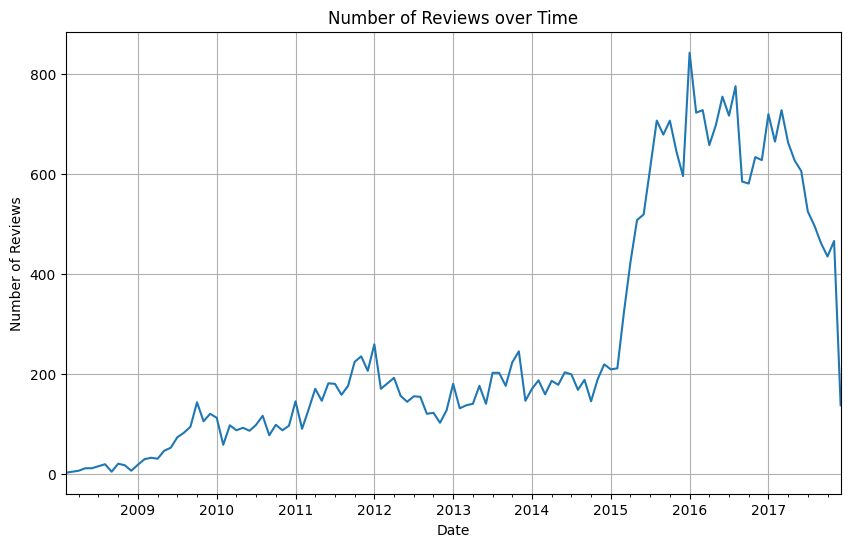

In [91]:
# I will try to plot the time series with the number of reviews over time

data["date"] = pd.to_datetime(data["date"], format='%d-%b-%y')

#resampling so that number of reviews was shown in monthly increments
monthly_reviews = data.resample('Me', on="date").size()

plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind="line", title="Number of Reviews over Time")
plt.xlabel("Date")
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

In [104]:
drug_name_ratings = data.groupby("provided_drug_name")["rating"].agg(["mean", "median", "count"])

top_10_avg = drug_name_ratings[.sort_values(by="mean", ascending=False).head(10)

top_10_median = drug_name_ratings.sort_values(by="median", ascending=False).head(10)

In [105]:
top_10_avg

,mean,median,count
provided_drug_name,,,
Elinest,10.000000,10.0,2
Take Action,10.000000,10.0,1
Provera,10.000000,10.0,1
Heather,9.750000,10.0,4
Ortho-Novum 7 / 7 / 7,9.666667,10.0,3
Plan B One-Step,8.712264,10.0,424
Plan B,8.670530,10.0,604
Ortho-Novum 1 / 35,8.500000,8.5,2
My Way,8.230769,9.0,13


In [ ]:
#it would make sense to have count higher than a ceretain number - 200?

In [116]:
drug_name_ratings = data.groupby("provided_drug_name")["rating"].agg(["mean", "median", "count"])

top_10_avg = drug_name_ratings[drug_name_ratings["count"] > 200].sort_values(by="mean", ascending=False).round(2).head(10)

top_10_median = drug_name_ratings[drug_name_ratings["count"] > 200].sort_values(by="median", ascending=False).round(2).head(10)

In [117]:
top_10_median

,mean,median,count
provided_drug_name,,,
Plan B One-Step,8.71,10.0,424
Plan B,8.67,10.0,604
Copper,7.23,9.0,607
Ortho Evra,7.47,9.0,219
Levonorgestrel,7.58,9.0,3350
Aviane,6.62,8.0,219
Skyla,7.26,8.0,822
Ethinyl estradiol / etonogestrel,6.63,8.0,631
Ethinyl estradiol / norelgestromin,6.72,8.0,373


In [ ]:
#what about the lowest performing drugs?

bottom_10_avg = drug_name_ratings[drug_name_ratings["count"] > 200].sort_values(by="mean", ascending=True).round(2).head(10)

bottom_10_median = drug_name_ratings[drug_name_ratings["count"] > 200].sort_values(by="median", ascending=True).round(2).head(10)

bottom_10_avg